In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and display the dataset
df = pd.read_csv('Airline_Delay_Cause.csv')
print(df.head())

   year  month carrier       carrier_name airport  arr_flights  arr_del15  \
0  2023      8      9E  Endeavor Air Inc.     ABE         89.0       13.0   
1  2023      8      9E  Endeavor Air Inc.     ABY         62.0       10.0   
2  2023      8      9E  Endeavor Air Inc.     AEX         62.0       10.0   
3  2023      8      9E  Endeavor Air Inc.     AGS         66.0       12.0   
4  2023      8      9E  Endeavor Air Inc.     ALB         92.0       22.0   

   carrier_ct  weather_ct  nas_ct  security_ct  late_aircraft_ct  \
0        2.25        1.60    3.16          0.0              5.99   
1        1.97        0.04    0.57          0.0              7.42   
2        2.73        1.18    1.80          0.0              4.28   
3        3.69        2.27    4.47          0.0              1.57   
4        7.76        0.00    2.96          0.0             11.28   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            2.0           1.0     1375.0           7

In [3]:
# Remove rows where arr_flights is zero to avoid division by zero
df = df[df["arr_flights"] > 0].reset_index(drop=True)

# Create delay_rate feature (fraction of flights delayed >=15 minutes)
df["delay_rate"] = df["arr_del15"] / df["arr_flights"]

print("Dataset shape after cleaning:", df.shape)
print(df.head())

Dataset shape after cleaning: (171426, 21)
   year  month carrier       carrier_name airport  arr_flights  arr_del15  \
0  2023      8      9E  Endeavor Air Inc.     ABE         89.0       13.0   
1  2023      8      9E  Endeavor Air Inc.     ABY         62.0       10.0   
2  2023      8      9E  Endeavor Air Inc.     AEX         62.0       10.0   
3  2023      8      9E  Endeavor Air Inc.     AGS         66.0       12.0   
4  2023      8      9E  Endeavor Air Inc.     ALB         92.0       22.0   

   carrier_ct  weather_ct  nas_ct  ...  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60    3.16  ...              5.99            2.0   
1        1.97        0.04    0.57  ...              7.42            0.0   
2        2.73        1.18    1.80  ...              4.28            1.0   
3        3.69        2.27    4.47  ...              1.57            1.0   
4        7.76        0.00    2.96  ...             11.28            2.0   

   arr_diverted  arr_delay  carrier_delay  

In [4]:
# One-hot encode categorical and object features
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("\nCategorical columns:", list(cat_cols))

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


Categorical columns: ['carrier', 'carrier_name', 'airport']


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,2023,8,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2023,8,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2023,8,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,...,False,False,False,False,False,False,False,False,False,False
3,2023,8,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,...,False,False,False,False,False,False,False,False,False,False
4,2023,8,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,...,False,False,False,False,False,False,False,False,False,False


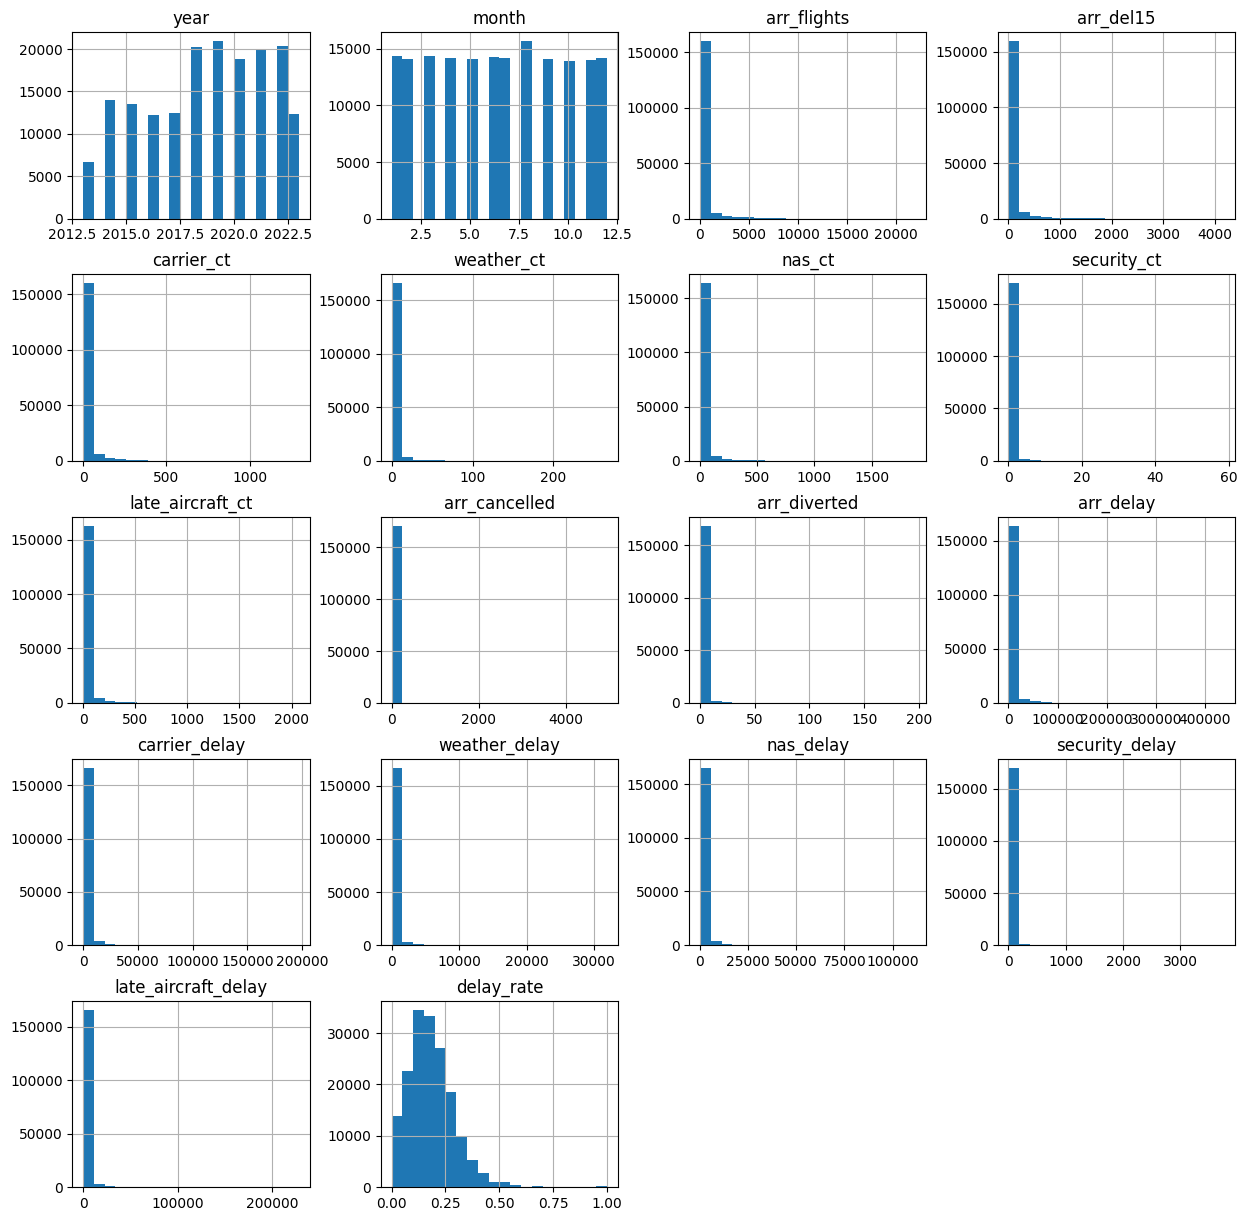

In [5]:
# Visualize the dataset using histograms
df.hist(bins=20, figsize=(15,15))
plt.show()